#Part I

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CPIAUCSL_2022.csv to CPIAUCSL_2022 (1).csv
Saving Data_year.csv to Data_year (1).csv
Saving GOLD_2022.csv to GOLD_2022 (1).csv
Saving SP500_2022.csv to SP500_2022 (1).csv
Saving UNRATE_2022.csv to UNRATE_2022 (1).csv


##Question 1


### import data

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
#input the data of the 4 variables
df1 = pd.read_csv('CPIAUCSL_2022.csv',index_col='Date', parse_dates=True)
df2 = pd.read_csv('GOLD_2022.csv',index_col='Date', parse_dates=True)
df3 = pd.read_csv('UNRATE_2022.csv',index_col='Date', parse_dates=True)
df4 = pd.read_csv('SP500_2022.csv',index_col='Date', parse_dates=True)

### Time-series plot


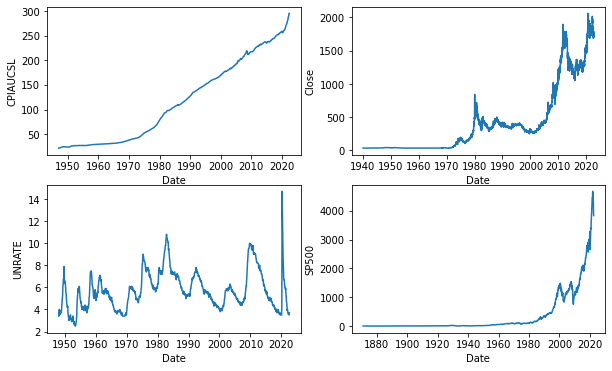

In [4]:

#Produce a time-series plot for each variable
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

df1['Date'] = df1.index
df2['Date'] = df2.index
df3['Date'] = df3.index
df4['Date'] = df4.index

sns.lineplot(ax=axes[0, 0],data=df1,x='Date', y='CPIAUCSL')
sns.lineplot(ax=axes[0, 1],data=df2,x='Date', y='Close')
sns.lineplot(ax=axes[1, 0],data=df3,x='Date', y='UNRATE')
sns.lineplot(ax=axes[1, 1],data=df4,x='Date', y='SP500')



### Transformed series plots

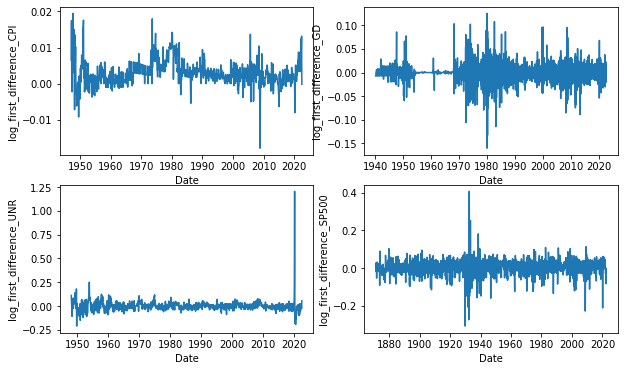

In [5]:

df1['log_first_difference_CPI']=np.log(df1['CPIAUCSL']/df1['CPIAUCSL'].shift(1)).dropna()
df2['log_first_difference_GD']=np.log(df2['Close']/df2['Close'].shift(1)).dropna()
df3['log_first_difference_UNR']=np.log(df3['UNRATE']/df3['UNRATE'].shift(1)).dropna()
df4['log_first_difference_SP500']=np.log(df4['SP500']/df4['SP500'].shift(1)).dropna()

df1.set_index('Date',drop=True)
df2.set_index('Date',drop=True)
df3.set_index('Date',drop=True)
df4.set_index('Date',drop=True)

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.lineplot(ax=axes[0, 0],data=df1,x='Date', y='log_first_difference_CPI')
sns.lineplot(ax=axes[0, 1],data=df2,x='Date', y='log_first_difference_GD')
sns.lineplot(ax=axes[1, 0],data=df3,x='Date', y='log_first_difference_UNR')
sns.lineplot(ax=axes[1, 1],data=df4,x='Date', y='log_first_difference_SP500')

### Augmented Dickey-Fuller test to formally show that our variable is non-stationary.

In [6]:
#a general function that returns the result of an ADF test regardless of the series chosen. 
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries,x):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, regression=x,autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [7]:
adf_test(df1['CPIAUCSL'],'c')
adf_test(df1['CPIAUCSL'],'nc')
adf_test(df1['CPIAUCSL'],'ct')

Results of Dickey-Fuller Test:
Test Statistic                   2.478461
p-value                          0.999043
#Lags Used                      15.000000
Number of Observations Used    891.000000
Critical Value (1%)             -3.437711
Critical Value (5%)             -2.864789
Critical Value (10%)            -2.568500
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   3.108869
p-value                          0.999894
#Lags Used                      15.000000
Number of Observations Used    891.000000
Critical Value (1%)             -2.568254
Critical Value (5%)             -1.941306
Critical Value (10%)            -1.616525
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -0.746888
p-value                          0.969877
#Lags Used                      15.000000
Number of Observations Used    891.000000
Critical Value (1%)             -3.968967
Critical Value (5%)             -3.415429
Critical Value (10%)            -3.12

We ran the ADF test three times to include different specifications of the ADF test. In none of the tests we were able to reject the null hypothesis of non-stationarity. Therefore, we conclude that our series definitely is non-stationary.

In [8]:
df1['CPIAUCSLlog'] = np.log(df1['CPIAUCSL'])
df1['DCPIlog'] = df1['CPIAUCSLlog'].diff()
adf_test(df1['DCPIlog'].iloc[1:],'c')

Results of Dickey-Fuller Test:
Test Statistic                  -4.335320
p-value                          0.000386
#Lags Used                      14.000000
Number of Observations Used    891.000000
Critical Value (1%)             -3.437711
Critical Value (5%)             -2.864789
Critical Value (10%)            -2.568500
dtype: float64


We reject the null hypothesis of non-stationarity. Therefore it is enough to difference our variable once.We just difference it once and it become stationary.

##Question2


Auto-correlation 

In [9]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

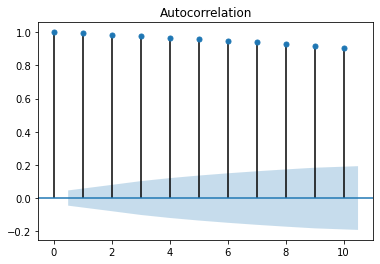

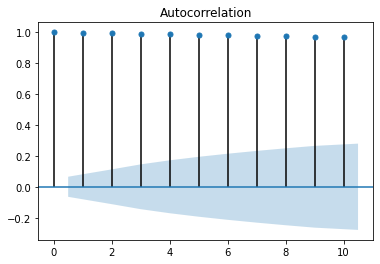

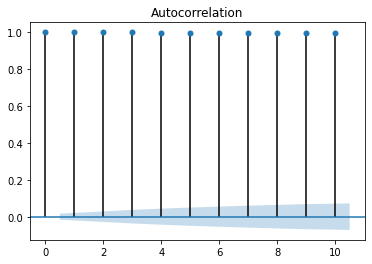

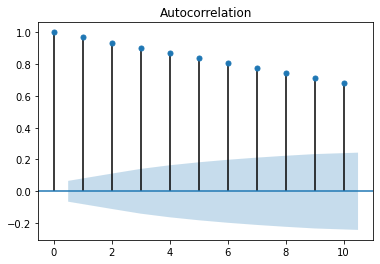

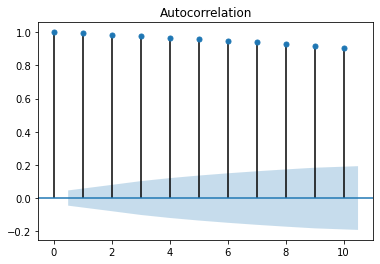

In [10]:
sm.graphics.tsa.plot_acf(df1['CPIAUCSL'].squeeze(), lags=10)
sm.graphics.tsa.plot_acf(df2['Close'].squeeze(), lags=10)
sm.graphics.tsa.plot_acf(df3['UNRATE'].squeeze(), lags=10)
sm.graphics.tsa.plot_acf(df4['SP500'].squeeze(), lags=10)

Partial Auto-Correlation 

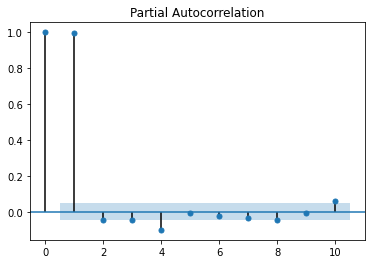

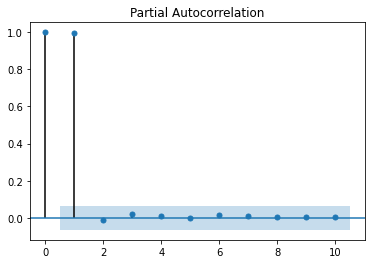

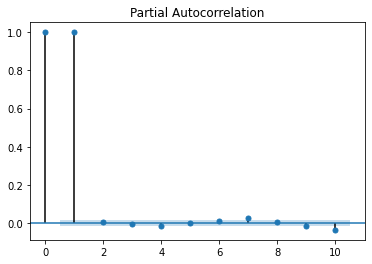

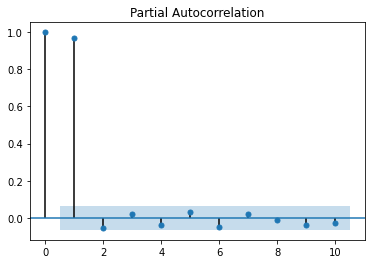

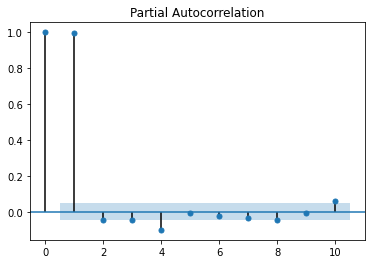

In [11]:
sm.graphics.tsa.plot_pacf(df1['CPIAUCSL'].squeeze(), lags=10)
sm.graphics.tsa.plot_pacf(df2['Close'].squeeze(), lags=10)
sm.graphics.tsa.plot_pacf(df3['UNRATE'].squeeze(), lags=10)
sm.graphics.tsa.plot_pacf(df4['SP500'].squeeze(), lags=10)

Ljung Box Test to test if the autocorrelation is statistically significant

In [12]:
sm.stats.acorr_ljungbox(df1['CPIAUCSL'], lags=[1], return_df=True, boxpierce=True)


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,903.792959,1.469870e-198,900.810144,6.541921e-198


In [ ]:
sm.stats.acorr_ljungbox(df1['CPIAUCSL'], lags=[12], return_df=True, boxpierce=True)


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
12,10523.762237,0.0,10426.097003,0.0


In [ ]:
sm.stats.acorr_ljungbox(df2['Close'], lags=[1], return_df=True, boxpierce=True)


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,14084.90717,0.0,14081.909106,0.0


In [ ]:
sm.stats.acorr_ljungbox(df2['Close'], lags=[12], return_df=True, boxpierce=True)


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
12,168422.608975,0.0,168321.125609,0.0


In [ ]:
sm.stats.acorr_ljungbox(df3['UNRATE'], lags=[1], return_df=True, boxpierce=True)


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,841.862397,4.272759e-185,839.049939,1.746428e-184


In [ ]:
sm.stats.acorr_ljungbox(df3['UNRATE'], lags=[12], return_df=True, boxpierce=True)


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
12,6925.26588,0.0,6866.734382,0.0


In [ ]:
sm.stats.acorr_ljungbox(df4['SP500'], lags=[1], return_df=True, boxpierce=True)


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,1796.749506,0.0,1793.789457,0.0


In [ ]:
sm.stats.acorr_ljungbox(df4['SP500'], lags=[12], return_df=True, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
12,19478.242951,0.0,19389.938267,0.0


## Question3


### ARMA model 


In [13]:
import statsmodels
import itertools
from statsmodels.tsa.arima.model import ARIMA

In [14]:
def AIC_PDQ(df,ar,ii,ma): 

# Define the p, d and q parameters to take any value between 0 and 2
    p = range(0,ar)
    d = range(0,ii)
    q = range(0, ma)

# Auto-Regressive (p) -> Number of autoregressive terms.
# Integrated (d) -> Number of nonseasonal differences needed for stationarity.
# Moving Average (q) -> Number of lagged forecast errors in the prediction equation.
# Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
# Run a grid with pdq and seasonal pdq parameters calculated above and get #the best AIC value
    ans = []
    for comb in pdq:
      try:
          mod = ARIMA(df,
                      order=comb,
                      enforce_stationarity=True,
                      enforce_invertibility=True)
          
          output = mod.fit()
          ans.append([comb, output.aic])
          print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, output.aic))
      except:
        continue
# Find the parameters with minimal AIC value
    ans_df = pd.DataFrame(ans, columns=['pdq', 'aic'])
    print(ans_df.loc[ans_df['aic'].idxmin()])
    return ans_df

In [15]:
def BIC_PDQ(df,ar,ii,ma): 

# Define the p, d and q parameters to take any user defined value. We need to be careful with integration order,
# cannot be 0.
    p = range(0,ar)
    d = range(0,ii)
    q = range(0, ma)

# Auto-Regressive (p) -> Number of autoregressive terms.
# Integrated (d) -> Number of nonseasonal differences needed for stationarity.
# Moving Average (q) -> Number of lagged forecast errors in the prediction equation.
# Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
# Run a grid with pdq and seasonal pdq parameters calculated above and get #the best AIC value
    ans = []
    for comb in pdq:
      try:
          mod = ARIMA(df,
                      order=comb,
                      enforce_stationarity=True,
                      enforce_invertibility=True)
          
          output = mod.fit()
          ans.append([comb, output.aic])
          print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, output.bic))
      except:
        continue
# Find the parameters with minimal AIC value
    ans_df = pd.DataFrame(ans, columns=['pdq', 'bic'])
    print(ans_df.loc[ans_df['bic'].idxmin()])
    return ans_df

In [16]:
AIC_PDQ(df1['DCPIlog'].iloc[1:],6,1,6)

pdq      (1, 0, 2)
aic   -8126.152166
Name: 8, dtype: object


,pdq,aic
0,"(0, 0, 0)",-7695.417068
1,"(0, 0, 1)",-7952.627219
2,"(0, 0, 2)",-7998.103492
3,"(0, 0, 3)",-8029.620725
4,"(0, 0, 4)",-8037.769982
5,"(0, 0, 5)",-8049.249898
6,"(1, 0, 0)",-8057.451479
7,"(1, 0, 1)",-8079.187191
8,"(1, 0, 2)",-8126.152166
9,"(1, 0, 3)",-8122.555006


In [ ]:
BIC_PDQ(df1['DCPIlog'].iloc[1:],6,1,6)

pdq      (1, 0, 2)
bic   -8126.152166
Name: 8, dtype: object


,pdq,bic
0,"(0, 0, 0)",-7695.417068
1,"(0, 0, 1)",-7952.627219
2,"(0, 0, 2)",-7998.103492
3,"(0, 0, 3)",-8029.620725
4,"(0, 0, 4)",-8037.769982
5,"(0, 0, 5)",-8049.249898
6,"(1, 0, 0)",-8057.451479
7,"(1, 0, 1)",-8079.187191
8,"(1, 0, 2)",-8126.152166
9,"(1, 0, 3)",-8122.555006


We tested the combination of AR and MA parameters, both AIC and BIC gives us the same answer。The best model appears to be an ARMA(1,2)

### Forecast with ARMA model

In [ ]:
df1_train = df1.iloc[1:638,]
df1_test = df1.iloc[638:,]

In [ ]:
mod_CPI = ARIMA(df1_train['DCPIlog'], order=(1,0,2))
mod_CPI_res = mod_CPI.fit()
mod_CPI_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                DCPIlog   No. Observations:                  637
Model:                 ARIMA(1, 0, 2)   Log Likelihood                2874.556
Date:                Thu, 29 Sep 2022   AIC                          -5739.111
Time:                        06:21:22   BIC                          -5716.827
Sample:                    02-01-1947   HQIC                         -5730.460
                         - 02-01-2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.001      4.768      0.000       0.002       0.005
ar.L1          0.9351      0.018     52.815      0.000       0.900       0.970
ma.L1         -0.5322      0.026    -20.520      0.000      -0.583      -0.481
ma.L2         -0.0848      0.031     -2.775      0.006      -0.145      -0.025
sigma2      7.033e-06   2.14e-07     32.813      0.000    6.61e-06    7.45e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):               839.68
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Question 4

###Plot the fitted value for ARIMA model

In [1]:
CPI_fit = mod_CPI_res.predict()

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
sns.lineplot(data=df1_train['DCPIlog'],label = 'Actual Returns')
sns.lineplot(data=CPI_fit, label = 'In Sample Fit')
plt.legend()
plt.show()

# Part II

In [17]:
from google.colab import files
uploaded = files.upload()

Saving Data_year.csv to Data_year.csv


## Question 1

###  CO2 time series plot

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df_co2=pd.read_csv('Data_year.csv',index_col='Date', parse_dates=True)
df_co2['Date']=pd.to_datetime(df_co2.Yr.astype(str) + '/' + df_co2.month.astype(str))
df_co2.set_index(df_co2['Date'],inplace=True)
df_co2.asfreq('MS')

FileNotFoundError: ignored

In [ ]:
sns.lineplot(data=df_co2,x='Date', y='co2_ppm')

Explanation:

## Question2

### choose the data up to 2019.12

In [ ]:
df_co2_09=df_co2.iloc[:548]
df_co2_09

,co2_ppm,Yr,month,Date
Date,,,,
1964-05-01,322.25000,1964,5,1964-05-01
1964-06-01,321.89001,1964,6,1964-06-01
1964-07-01,320.44000,1964,7,1964-07-01
1964-08-01,318.69000,1964,8,1964-08-01
1964-09-01,316.70999,1964,9,1964-09-01
...,...,...,...,...
2009-08-01,386.06000,2009,8,2009-08-01
2009-09-01,384.64001,2009,9,2009-09-01
2009-10-01,384.32001,2009,10,2009-10-01


### estimate linear trend model

In [ ]:
df_co2_09['trend'] = [i for i in range(1,len(df_co2_09)+1)]
import statsmodels.api as sm
import statsmodels.formula.api as smf
model_trend = smf.ols(formula = 'co2_ppm~ 1 + trend', data= df_co2_09).fit()
model_trend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                co2_ppm   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 2.945e+04
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        07:30:00   Log-Likelihood:                -1325.4
No. Observations:                 548   AIC:                             2655.
Df Residuals:                     546   BIC:                             2663.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    315.1337      0.233   1352.985      0.000     314.676     315.591
trend          0.1262      0.001    171.607      0.000       0.125       0.128
==============================================================================
Omnibus:                        9.074   Durbin-Watson:                   0.206
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                5.696
Skew:                           0.063   Prob(JB):                       0.0580
Kurtosis:                       2.517   Cond. No.                         635.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

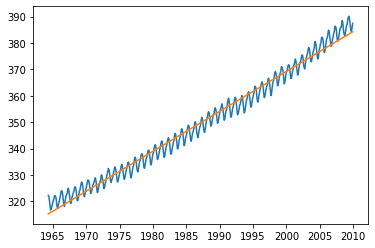

In [ ]:
df_co2_09['trend_linerfit']=model_trend.predict()
plt.plot(df_co2_09['co2_ppm'])
plt.plot(df_co2_09['trend_linerfit'])

Explanation:


## Question 3

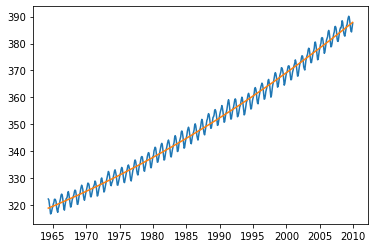

In [ ]:
df_co2_09['trend2'] = [i**2 for i in range(1,len(df_co2_09)+1)]
model_trend_2 = smf.ols(formula = 'co2_ppm~ 1 + trend + trend2', data= df_co2_09).fit()
df_co2_09['trend2_squfit'] = model_trend_2.predict()
plt.plot(df_co2_09['co2_ppm'])
plt.plot(df_co2_09['trend2_squfit'])

### ARMA model

In [ ]:
adf_test(df_co2_09['co2_ppm'],'c')
adf_test(df_co2_09['co2_ppm'],'nc')
adf_test(df_co2_09['co2_ppm'],'ct')

Results of Dickey-Fuller Test:
Test Statistic                   2.490175
p-value                          0.999047
#Lags Used                      14.000000
Number of Observations Used    533.000000
Critical Value (1%)             -3.442678
Critical Value (5%)             -2.866978
Critical Value (10%)            -2.569666
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   4.981777
p-value                          1.000000
#Lags Used                      14.000000
Number of Observations Used    533.000000
Critical Value (1%)             -2.569948
Critical Value (5%)             -1.941516
Critical Value (10%)            -1.616331
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -1.008426
p-value                          0.942970
#Lags Used                      14.000000
Number of Observations Used    533.000000
Critical Value (1%)             -3.975856
Critical Value (5%)             -3.418759
Critical Value (10%)            -3.13

In [ ]:
df_co2_09['co2log'] = np.log(df_co2_09['co2_ppm'])
df_co2_09['Dco2log'] = df_co2_09['co2log'].diff()
adf_test(df_co2_09['Dco2log'].iloc[1:],'c')

Results of Dickey-Fuller Test:
Test Statistic                  -5.286461
p-value                          0.000006
#Lags Used                      13.000000
Number of Observations Used    533.000000
Critical Value (1%)             -3.442678
Critical Value (5%)             -2.866978
Critical Value (10%)            -2.569666
dtype: float64


if necessary try to use AIC to see the best ARMA parameter

## Question 4

### Add seansonal dummy

In [ ]:
season=pd.DataFrame(pd.get_dummies(df_co2_09.month))
season.head(24)
season.columns= ['Jan', 'Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov','Dec']
season

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Date,,,,,,,,,,,,
1964-05-01,0,0,0,0,1,0,0,0,0,0,0,0
1964-06-01,0,0,0,0,0,1,0,0,0,0,0,0
1964-07-01,0,0,0,0,0,0,1,0,0,0,0,0
1964-08-01,0,0,0,0,0,0,0,1,0,0,0,0
1964-09-01,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2009-08-01,0,0,0,0,0,0,0,1,0,0,0,0
2009-09-01,0,0,0,0,0,0,0,0,1,0,0,0
2009-10-01,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_co2_09=pd.concat([df_co2_09,season],axis=1)
df_co2_09

,co2_ppm,Yr,month,Date,trend,trend_linerfit,trend2,trend2_squfit,co2log,Dco2log,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Date,,,,,,,,,,,,,,,,,,,,,
1964-05-01,322.25000,1964,5,1964-05-01,1,315.259852,1,318.856553,5.775328,NaN,...,0,0,1,0,0,0,0,0,0,0
1964-06-01,321.89001,1964,6,1964-06-01,2,315.386012,4,318.943262,5.774210,-0.001118,...,0,0,0,1,0,0,0,0,0,0
1964-07-01,320.44000,1964,7,1964-07-01,3,315.512172,9,319.030115,5.769695,-0.004515,...,0,0,0,0,1,0,0,0,0,0
1964-08-01,318.69000,1964,8,1964-08-01,4,315.638333,16,319.117112,5.764219,-0.005476,...,0,0,0,0,0,1,0,0,0,0
1964-09-01,316.70999,1964,9,1964-09-01,5,315.764493,25,319.204254,5.757986,-0.006232,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-08-01,386.06000,2009,8,2009-08-01,544,383.764922,295936,387.204683,5.955993,-0.005141,...,0,0,0,0,0,1,0,0,0,0
2009-09-01,384.64001,2009,9,2009-09-01,545,383.891083,297025,387.369862,5.952308,-0.003685,...,0,0,0,0,0,0,1,0,0,0
2009-10-01,384.32001,2009,10,2009-10-01,546,384.017243,298116,387.535185,5.951476,-0.000832,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
model_trs = smf.ols(formula='co2_ppm ~ 1 + trend + trend2 + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec', data = df_co2_09).fit()
model_trs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                co2_ppm   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.259e+04
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        07:30:05   Log-Likelihood:                -520.19
No. Observations:                 548   AIC:                             1068.
Df Residuals:                     534   BIC:                             1129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    318.8152      0.122   2611.372      0.000     318.575     319.055
trend          0.0861      0.001    125.646      0.000       0.085       0.087
trend2       7.31e-05   1.21e-06     60.457      0.000    7.07e-05    7.55e-05
Feb            0.6646      0.134      4.977      0.000       0.402       0.927
Mar            1.3725      0.134     10.279      0.000       1.110       1.635
Apr            2.5606      0.134     19.177      0.000       2.298       2.823
May            3.0013      0.133     22.600      0.000       2.740       3.262
Jun            2.3296      0.133     17.542      0.000       2.069       2.590
Jul            0.7571      0.133      5.701      0.000       0.496       1.018
Aug           -1.3688      0.133    -10.307      0.000      -1.630      -1.108
Sep           -3.1952      0.133    -24.060      0.000      -3.456      -2.934
Oct           -3.3351      0.133    -25.114      0.000      -3.596      -3.074
Nov           -2.1010      0.133    -15.821      0.000      -2.362      -1.840
Dec           -0.9266      0.133     -6.977      0.000      -1.187      -0.666
==============================================================================
Omnibus:                        1.734   Durbin-Watson:                   0.236
Prob(Omnibus):                  0.420   Jarque-Bera (JB):                1.589
Skew:                          -0.018   Prob(JB):                        0.452
Kurtosis:                       2.739   Cond. No.                     1.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

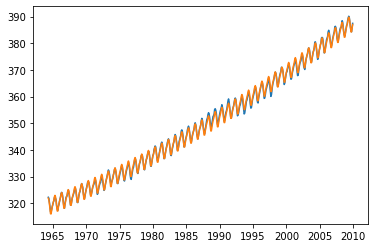

In [ ]:
df_co2_09['trs_fit'] =model_trs.predict()
plt.plot(df_co2_09['co2_ppm'])
plt.plot(df_co2_09['trs_fit'])

## Question 5

In [ ]:
df_co2_0921=df_co2[548:689]

season=pd.DataFrame(pd.get_dummies(df_co2_0921.month))
season.head(24)
season.columns= ['Jan', 'Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov','Dec']
season
df_co2_0921['trend'] = [i for i in range(549,len(df_co2_0921)+549)]
df_co2_0921['trend2'] = [i**2 for i in range(549,len(df_co2_0921)+549)]
df_co2_0921=pd.concat([df_co2_0921,season],axis=1)
df_co2_0921


,co2_ppm,Yr,month,Date,trend,trend2,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Date,,,,,,,,,,,,,,,,,,
2010-01-01,388.54999,2010,1,2010-01-01,549,301401,1,0,0,0,0,0,0,0,0,0,0,0
2010-02-01,390.07999,2010,2,2010-02-01,550,302500,0,1,0,0,0,0,0,0,0,0,0,0
2010-03-01,391.01999,2010,3,2010-03-01,551,303601,0,0,1,0,0,0,0,0,0,0,0,0
2010-04-01,392.39001,2010,4,2010-04-01,552,304704,0,0,0,1,0,0,0,0,0,0,0,0
2010-05-01,393.23999,2010,5,2010-05-01,553,305809,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,418.95001,2021,5,2021-05-01,685,469225,0,0,0,0,1,0,0,0,0,0,0,0
2021-06-01,418.70001,2021,6,2021-06-01,686,470596,0,0,0,0,0,1,0,0,0,0,0,0
2021-07-01,416.64999,2021,7,2021-07-01,687,471969,0,0,0,0,0,0,1,0,0,0,0,0


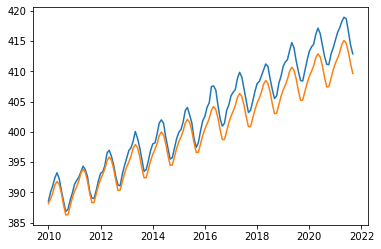

In [ ]:
df_co2_0921['trs_fit']=model_trs.predict(df_co2_0921)
plt.plot(df_co2_0921['co2_ppm'])
plt.plot(df_co2_0921['trs_fit'])